## Tarea 5: Proyecto Análisis de Datos - Kaleth Cristancho

### Pasos de la actividad - Regresión Logística
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [199]:
#cargar las librerias necesarias
import pandas as pd #maneja y analisa estructura de datos.
import numpy as np # calculo numerico y el analisis de datos
import seaborn as sns # creacion graficos estadisticos
import matplotlib.pyplot as plt # crea graficos en 2 dimensiones

# librerias para implementar modelo de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [200]:
# Lectura de datos y se cargan en la variable datos
Dataset = pd.read_csv('./Titanic-Dataset.csv')

In [201]:
# se realiza la lectura de los datos para el analisis exploratorio
Dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [202]:
#Describir los datos
Dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


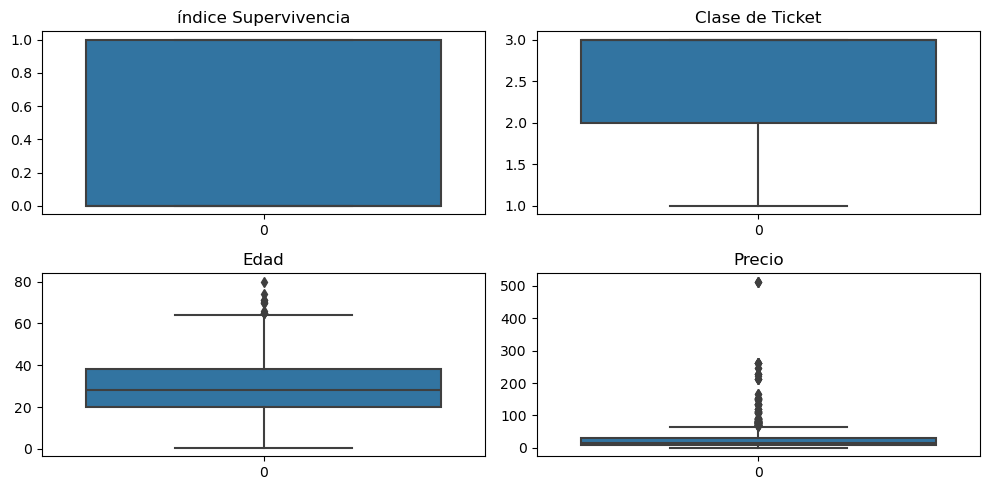

In [203]:
# Identificacion de valores faltantes y atipicos
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(Dataset['Survived'], ax = axs[0,0]).set_title("índice Supervivencia")
plt2 = sns.boxplot(Dataset['Pclass'], ax = axs[0,1]).set_title("Clase de Ticket")
plt3 = sns.boxplot(Dataset['Age'], ax = axs[1,0]).set_title("Edad")
plt1 = sns.boxplot(Dataset['Fare'], ax = axs[1,1]).set_title("Precio")

plt.tight_layout()

Text(0.5, 1.0, 'Cantidad de sobrevivientes')

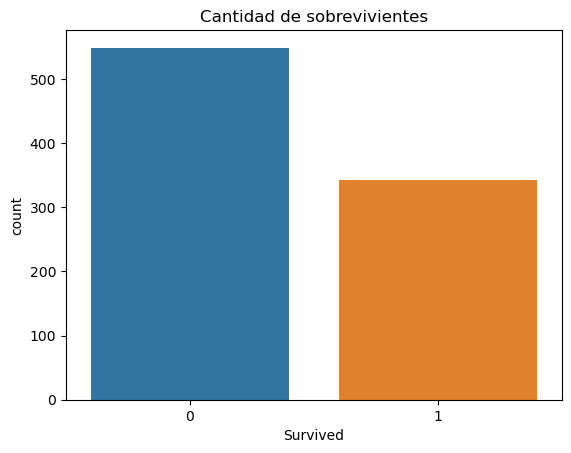

In [204]:
#Lista de sobrevivientes
data = Dataset[['Survived']].astype(str)
sns.countplot(x='Survived', data=data.dropna()).set_title("Cantidad de sobrevivientes")

Text(0.5, 1.0, 'Sobreviventes por Género')

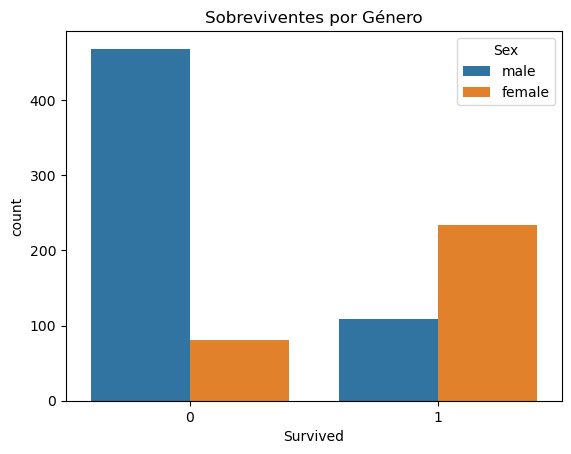

In [205]:
#Comparación de sobrevivientes por género
data = Dataset[['Survived', 'Sex']].astype(str)
sns.countplot(x='Survived', hue='Sex', data=data.dropna()).set_title("Sobreviventes por Género")

Se observa que de los supervivientes, la mayoría fueron del sexo femenino. Por otro lado, fue el sexo masculino quien menos sobrevivió.

Text(0.5, 1.0, 'Sobrevivientes por Clase')

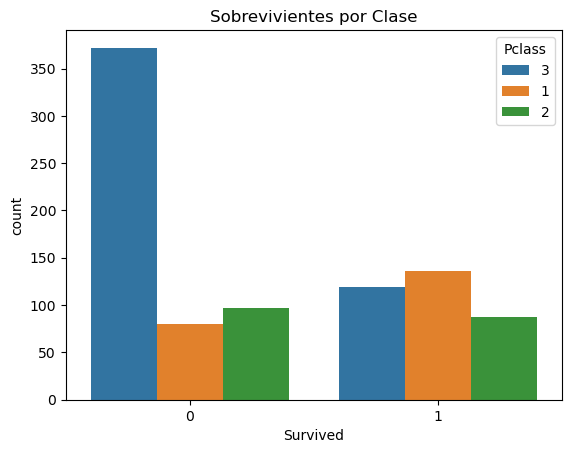

In [206]:
#Comparación de sobrevivientes por clase
data = Dataset[['Survived', 'Pclass']].astype(str)
sns.countplot(x='Survived', hue='Pclass', data=data.dropna()).set_title("Sobrevivientes por Clase")

Se observa que de entre las 3 clases disponibles en el Titanic, la que más sobrevivientes tuvo fue la clase 1, mientras que la que más muertos presentó fue la clase 3.

Text(0.5, 1.0, 'Sobrevivientes por Embarcaciones')

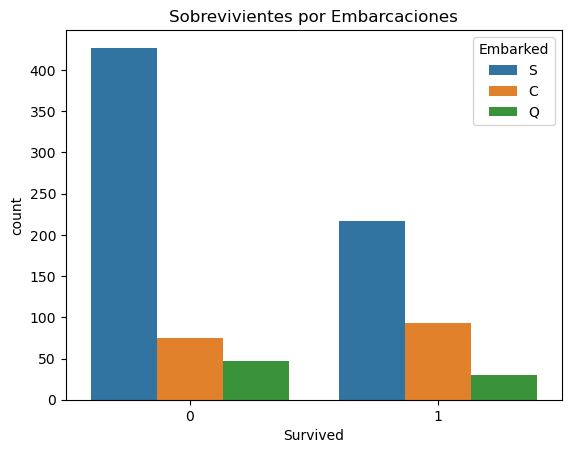

In [207]:
#Comparación de sobrevivientes por embarcaciones
data = Dataset[['Survived', 'Embarked']].dropna().astype(str)
sns.countplot(x='Survived', hue='Embarked', data=data).set_title("Sobrevivientes por Embarcaciones")

Se observa que la embarcación con un mayor índice de supervivientes y no supervivientes fue la S, mientras que la Q fue la embarcación con un menor índice para ambos escenarios.

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

### Datos faltantes

In [208]:
#Revision de datos faltantes

#Registros numéricos
print("Cantidad de registros nulos en Id: ", Dataset['PassengerId'].isna().sum())
print("Cantidad de registros nulos en Clase del ticket: ", Dataset['Pclass'].isna().sum())
print("Cantidad de registros nulos en Género: ", Dataset['Sex'].isna().sum())
print("Cantidad de registros nulos en Edad: ", Dataset['Age'].isna().sum())
print("Cantidad de registros nulos en Cantidad de hermanos/parejas: ", Dataset['SibSp'].isna().sum())
print("Cantidad de registros nulos en Cantidad de padres/hijos: ", Dataset['Parch'].isna().sum())
print("Cantidad de registros nulos en Cantidad de precios: ", Dataset['Fare'].isna().sum())

#Registros textuales
print("Cantidad de registros nulos en Sobrevivió: ", Dataset['Survived'].isna().sum())
print("Cantidad de registros nulos en nombre: ", Dataset['Name'].isna().sum())
print("Cantidad de registros nulos en ticket: ", Dataset['Ticket'].isna().sum())
print("Cantidad de registros nulos en cabina: ", Dataset['Cabin'].isna().sum())
print("Cantidad de registros nulos en Embarcación: ", Dataset['Embarked'].isna().sum())

Cantidad de registros nulos en Id:  0
Cantidad de registros nulos en Clase del ticket:  0
Cantidad de registros nulos en Género:  0
Cantidad de registros nulos en Edad:  177
Cantidad de registros nulos en Cantidad de hermanos/parejas:  0
Cantidad de registros nulos en Cantidad de padres/hijos:  0
Cantidad de registros nulos en Cantidad de precios:  0
Cantidad de registros nulos en Sobrevivió:  0
Cantidad de registros nulos en nombre:  0
Cantidad de registros nulos en ticket:  0
Cantidad de registros nulos en cabina:  687
Cantidad de registros nulos en Embarcación:  2


In [209]:
# Reemplazar los ceros o vacíos con el valor medio o la moda de la columna

#Edad
Dataset['Age'] = Dataset['Age'].mask(Dataset['Age']=='nan', None).ffill()

#Cabina - Reemplazamos valor vacío con el valor de la casilla anterior y luego la posterior
Dataset['Cabin'] = Dataset['Cabin'].mask(Dataset['Cabin']=='nan', None).ffill()
Dataset['Cabin'] = Dataset['Cabin'].mask(Dataset['Cabin']=='nan', None).bfill()

#Embarcación - Reemplazamos valor vacío con el valor de la casilla anterior
Dataset['Embarked'] = Dataset['Embarked'].mask(Dataset['Embarked']=='nan', None).ffill()

In [210]:
#Se vuelven a verificar los datos faltantes

#Registros numéricos
print("Cantidad de registros nulos en Edad: ", Dataset['Age'].isna().sum())

#Registros textuales
print("Cantidad de registros nulos en cabina: ", Dataset['Cabin'].isna().sum())
print("Cantidad de registros nulos en Embarcación: ", Dataset['Embarked'].isna().sum())

Cantidad de registros nulos en Edad:  0
Cantidad de registros nulos en cabina:  0
Cantidad de registros nulos en Embarcación:  0


### Datos Atípicos

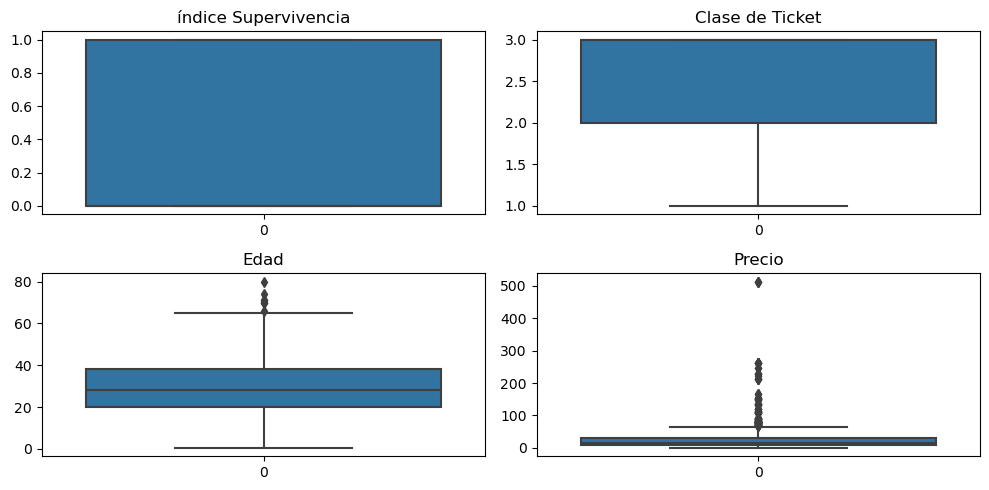

In [211]:
# Identificacion de valores faltantes y atipicos
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(Dataset['Survived'], ax = axs[0,0]).set_title("índice Supervivencia")
plt2 = sns.boxplot(Dataset['Pclass'], ax = axs[0,1]).set_title("Clase de Ticket")
plt3 = sns.boxplot(Dataset['Age'], ax = axs[1,0]).set_title("Edad")
plt1 = sns.boxplot(Dataset['Fare'], ax = axs[1,1]).set_title("Precio")

plt.tight_layout()

In [212]:
# Conteo de datos atipicos

#Indice Supervivencia
supMin = 0
supMax = 1
Survived_Total_Atipicos = ((Dataset['Survived']<supMin) | (Dataset['Survived']>supMax)).sum()
print("Total atipicos supervivencia: {}".format(Survived_Total_Atipicos))

#Clase Ticket
classMin = 1
classMax = 3
TicketClass_Atipicos = ((Dataset['Pclass']<classMin) | (Dataset['Pclass']>classMax)).sum()
print("Total atipicos Clase: {}".format(TicketClass_Atipicos))

#Edad
ageMin = 0
ageMax = 80
age_Atipicos = ((Dataset['Age']<ageMin) | (Dataset['Age']>ageMax)).sum()
print("Total atipicos edad: {}".format(age_Atipicos))

#Precios
priceMin = 5
priceMax = 480
price_Atipicos = ((Dataset['Fare']<priceMin) | (Dataset['Fare']>priceMax)).sum()
print("Total atipicos Precios: {}".format(price_Atipicos))

Total atipicos supervivencia: 0
Total atipicos Clase: 0
Total atipicos edad: 0
Total atipicos Precios: 19


In [213]:
# Se filtran datos atipicos

#Precios
Dataset=Dataset[(Dataset['Fare']<=priceMax)&(Dataset['Fare']>=priceMin)]

In [214]:
# Se valida si se removieron los datos atipicos

#Precios
price_Atipicos = ((Dataset['Fare']<priceMin) | (Dataset['Fare']>priceMax)).sum()
print("Total atipicos Precios: {}".format(price_Atipicos))

Total atipicos Precios: 0


### Transformación de Datos

In [215]:
#Removemos columnas que no sean de utilidad
Dataset.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis = 1, inplace = True)

In [216]:
#Transformamos Columnas que puedan clasificarse, en este caso, género y embarcación
Dataset.replace({'Sex': {'female': 0, 'male': 1}}, inplace=True)
Dataset['Sex'].value_counts()

Sex
1    559
0    313
Name: count, dtype: int64

In [217]:
Dataset.replace({'Embarked': {'C': 0, 'S': 1, 'Q': 2}}, inplace=True)
Dataset['Embarked'].value_counts()

Embarked
1    629
0    165
2     78
Name: count, dtype: int64

In [218]:
#revision del dataset
Dataset.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [219]:
#revision de tipo de datos y datos faltantes
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 872 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  872 non-null    int64  
 1   Pclass    872 non-null    int64  
 2   Sex       872 non-null    int64  
 3   Age       872 non-null    float64
 4   SibSp     872 non-null    int64  
 5   Parch     872 non-null    int64  
 6   Fare      872 non-null    float64
 7   Embarked  872 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 61.3 KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Característica de interes:
* Columna 'Survived' (0 = no sobrevivió, 1 = sí) pues nos indica si una persona sobrevivió o no


In [220]:
Dataset['Survived'].value_counts()

Survived
0    534
1    338
Name: count, dtype: int64

In [221]:
Dataset[['Survived']].head(10)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


## 4.  dividir el dataset en train y test para evaluar el modelo.

In [222]:
#porcentaje de datos para entrenamiento(train) = 75%, y para prueba (test) = 25%
# se crean variables x y Y para almacenar la informacion del entrenamiento 

x = Dataset.drop('Survived', axis = 1) # se cargan los datos de train sin los datos de la columna Survivied
y = Dataset['Survived'] # Se cargan los datos de train con los datos de la columna Survived

#La funcion train_test_split crea una division de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify= y, random_state= 0)


In [223]:
print (x_train)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
639       3    1  41.0      1      0   16.1000         1
176       3    1  18.0      3      1   25.4667         1
626       2    1  57.0      0      0   12.3500         2
733       2    1  23.0      0      0   13.0000         1
332       1    1  38.0      0      1  153.4625         1
..      ...  ...   ...    ...    ...       ...       ...
6         1    1  54.0      0      0   51.8625         1
739       3    1  35.0      0      0    7.8958         1
720       2    0   6.0      0      1   33.0000         1
783       3    1  29.0      1      2   23.4500         1
376       3    0  22.0      0      0    7.2500         1

[654 rows x 7 columns]


In [224]:
print (y_train)

639    0
176    0
626    0
733    0
332    0
      ..
6      0
739    0
720    1
783    0
376    1
Name: Survived, Length: 654, dtype: int64


## 5. Entrenar el modelo configurando los diferentes hiperparametros

In [225]:
# Se construye el modelo de regresion logistica
modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificacion y regresion
modelo_regresion .fit (x_train, y_train)

# crea el modelo de prediccion
prediction = modelo_regresion.predict(x_test)# predict nos predice los valores a partir del conjunto de datos de validacion


In [226]:
print (y_test)

309    1
812    0
296    0
345    1
69     0
      ..
725    0
516    1
585    1
492    0
201    0
Name: Survived, Length: 218, dtype: int64


In [227]:
print (prediction)

[1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1
 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0
 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [228]:
# Desempeño del modelo de regresion
print(classification_report(y_test, prediction)) # compara lo que deberia ser vs lo que se predijo

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       133
           1       0.78      0.66      0.71        85

    accuracy                           0.79       218
   macro avg       0.79      0.77      0.78       218
weighted avg       0.79      0.79      0.79       218



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

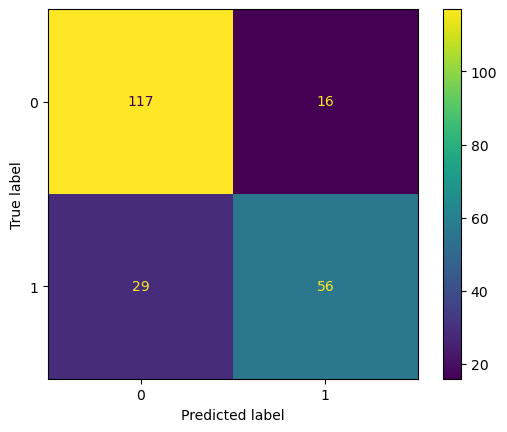

In [229]:
# matriz de confusion
cm = confusion_matrix(y_test, prediction)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

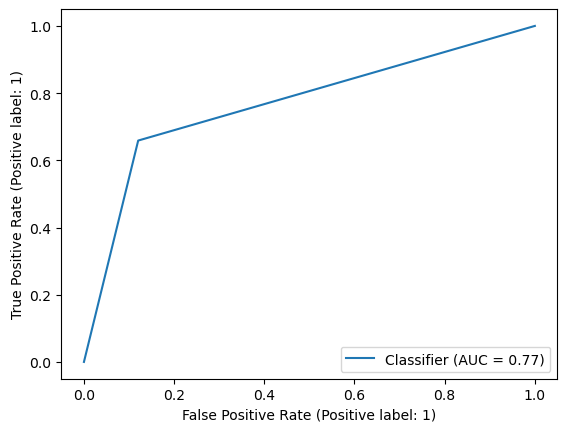

In [230]:
# curva de precison del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, prediction)
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos.

Del desempeño del modelo se puede describir:

- Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Aquí la precisión para la clase "Survived" es 0.80 para 0 y de 0.78 para 1, lo que significa que el 80% de los predichos como no sobrevivientes y el 78% predichos como sobrevivientes fueron correctos.
- Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la clase "Survived" es 0.88 para 0 y 0.66 para 1, lo que indica que el modelo predijo correctamente al 88% de los que no sobrevivieron y al 66% de los que sí.
- F1 Score: Es la media armónica de precisión y recuperación. Proporciona una puntuación única que equilibra la Precisión y Recall. Aquí la puntuación F1 para la clase "Survived" es 0.84 para 0 y 0.71 para 1, esto quiere decir que en efecto hay un equilibrio entre los métodos precisión y recall implementados en el modelo.

De la Matriz de Confusión podemos interpretar:

- Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 117
- Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 56
- Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 16
- Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 29

De la curva de precisión del modelo se puede interpretar:

- El AUC es 0.77 lo que significa que el 77 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación.